## Airline Passenger Satisfaction - Tabular Dataset Classification

En este proyecto, se utilizará un conjunto de datos de vuelos comerciales que contiene información detallada sobre los pasajeros y su percepción respecto a diversos aspectos del servicio aéreo. El objetivo principal es analizar, visualizar y modelar la satisfacción de los pasajeros a partir de diferentes variables.

Fuente: _**[Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)**_

Utilizaremos 2 archivos:
- **Train**: `airline_passenger_satisfaction_train.csv`
- **Test**: `airline_passenger_satisfaction_test.csv`

Como en este proyecto ya tenemos la separación de **Train** y **Test** vamos primero a trabajar con el conjunto de **Train** y usaremos el conjunto de **Test** para calcular el rendimiento del modelo.

Información del **DataFrame**:

| Columna                              | Descripción                                                          |
|--------------------------------------|----------------------------------------------------------------------|
| **id**                               | Passenger ID number.                                                 |
| **Gender**                           | Gender of the passengers (Female, Male)                              |
| **Customer Type**                    | The customer type (Loyal customer, disloyal customer)                |
| **Age**                              | The actual age of the passengers                                     |
| **Type of Travel**                   | Purpose of the flight (Personal Travel, Business Travel)             |
| **Class**                            | Travel class in the plane (Business, Eco, Eco Plus)                  |
| **Flight distance**                  | The flight distance of this journey                                  |
| **Inflight wifi service**            | Satisfaction level of inflight wifi service (0: Not Applicable; 1-5) |
| **Departure/Arrival time convenient**| Satisfaction level of Departure/Arrival time convenience             |
| **Ease of Online booking**           | Satisfaction level of online booking                                 |
| **Gate location**                    | Satisfaction level of Gate location                                  |
| **Food and drink**                   | Satisfaction level of Food and drink                                 |
| **Online boarding**                  | Satisfaction level of online boarding                                |
| **Seat comfort**                     | Satisfaction level of Seat comfort                                   |
| **Inflight entertainment**           | Satisfaction level of Inflight entertainment                         |
| **On-board service**                 | Satisfaction level of On-board service                               |
| **Leg room service**                 | Satisfaction level of Leg room service                               |
| **Baggage handling**                 | Satisfaction level of Baggage handling                               |
| **Check-in service**                 | Satisfaction level of Check-in service                               |
| **Inflight service**                 | Satisfaction level of Inflight service                               |
| **Cleanliness**                      | Satisfaction level of Cleanliness                                    |
| **Departure Delay in Minutes**       | Minutes delayed at departure                                         |
| **Arrival Delay in Minutes**         | Minutes delayed at arrival                                           |
| **Satisfaction**                     | Airline satisfaction level (Satisfaction, Neutral or Dissatisfaction)|

#### 01. Exploratory Data Analysis

Usando el conjunto de **Train**, define una función que tome una columna del **DataFrame** y que represente con una gráfica su relación con la columna **target** (_Satisfaction_) usando _**sns.countplot()**_ o _**sns.boxplot()**_ dependiendo del tipo de dato de la columna.

#### 02. Procesamiento de Datos

Usando el conjunto de **Train**, usa transformaciones para representar cada columna de forma numérica:
- Tratamiento de **NaN's**.
- Tratamiento de outliers.
- Usa _**OneHotEncoder**_ para las columnas categóricas.
- Usa _**LabelEncoder**_ para la columna _**target**.
- Muestra el mapa de correlaciones con el **DataFrame** ya transformado.

Usando los conjuntos de **Train** y **Test**:
- Define las variables: _**X_train**_, _**X_test**_, _**y_train**_, _**y_test**_
- Escala los datos del conjunto de **Train** con _**MinMaxScaler**_.
- Aplica las mismas transformaciones al conjunto de **Test**. Usa los encoders ya entrenados y la misma estratégia para los NaN's. No elimines outliers de este conjunto. Escala los datos con el escalador ya entrenado.

#### 03. Modelo de Clasificación (Machine Learning) y Métricas

- Entrena distintos modelos de clasificación usando _**X_train**_ e _**y_train**_ y calcula las métricas para cada modelo usando _**X_test**_ e _**y_test**_. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el método de _**.predict_proba()**_ con el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 04. Modelo de Clasificación (Deep Learning) y Métricas

- Define una Red Neuronal para clasificación binaria usando _**X_train**_ e _**y_train**_ y calcula las métricas de la red neuronal usando _**X_test**_ e _**y_test**_, la función de activación de la capa de salida debe de ser **Sigmoid**. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 05. Resultados

- ¿Cuál es la mejor métrica para este tipo de problema?
- ¿Que modelo de Machine Learning tiene mejor rendimiento?
- ¿Cuál es el mejor threshold para este modelo?
- ¿Es mejor el modelo de Deep Learning que los modelos de Machine Learning?
- ¿Cuál threshold es el mejor para el modelo de Deep Learning?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
df_train = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_train.csv")
df_test = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_test.csv")

print(f"Train: {df_train.shape}, Test: {df_test.shape}")

Train: (103904, 24), Test: (25976, 24)


### Análisis Exploratorio: Relación entre Variables y Satisfacción

Se ha definido una función llamada `relation_plot()` para visualizar la relación entre cualquier columna del dataset y la variable objetivo `satisfaction`. La función elige automáticamente el tipo de gráfico en función del tipo de dato:

- Si la columna es **numérica**:
  - Se usa un **boxplot** para comparar la distribución según `satisfaction`.
  - Si se pasa el argumento `log=True`, se aplica un **logaritmo natural (log1p)** para estabilizar la varianza o manejar valores muy desbalanceados.

- Si la columna es **categórica**, se usa un **countplot** diferenciado por `satisfaction`.

Esto permite detectar relaciones interesantes que pueden influir en la satisfacción del pasajero, como diferencias de edad, retrasos o tipo de cliente.


In [4]:
def relation_plot(df, column, target='satisfaction', log=False):
    
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column]): # Verifica si la columna es numérica
        if log and df[column].min() < 0:
            raise ValueError("No se puede aplicar logaritmo a valores negativos. Asegúrate de que todos los valores sean >= 0.")
        data = df.copy()
        if log:
            data[column] = np.log1p(data[column])  # log1p para manejar ceros
            plt.title(f'Distribución logarítmica de {column} según {target}')
        else:
            plt.title(f'Distribución de {column} según {target}')
        sns.boxplot(x=target, y=column, data=data)
    else:
        sns.countplot(x=column, hue=target, data=df)
        plt.title(f'Recuento de {column} según {target}')
        plt.xticks(rotation=45) # Rota las etiquetas del eje X 45 grados para que no se monten si son muy largas
    plt.tight_layout() # Ajusta automáticamente los márgenes del gráfico para que nada quede fuera del área visible.
    plt.show()

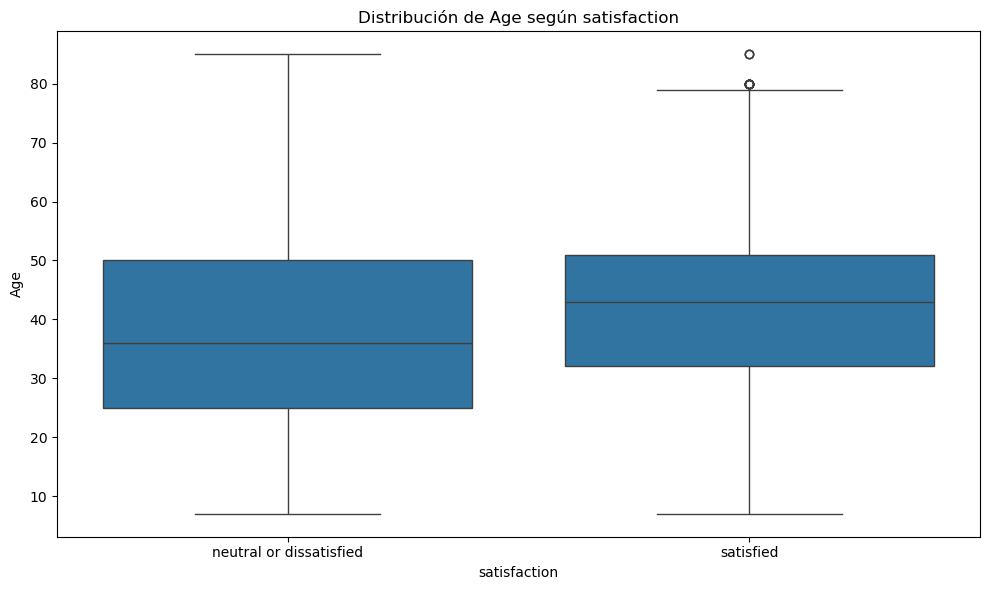

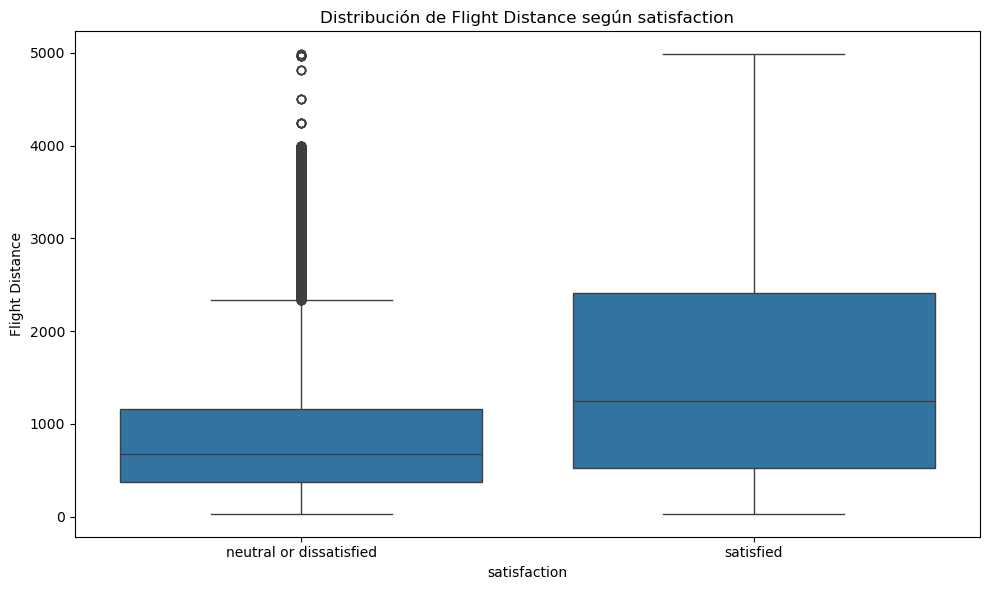

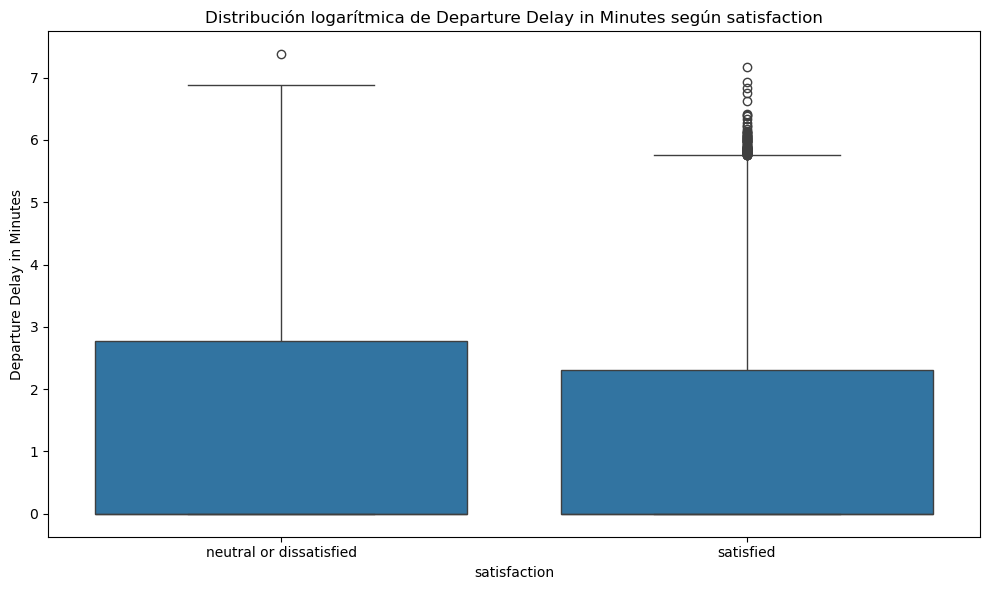

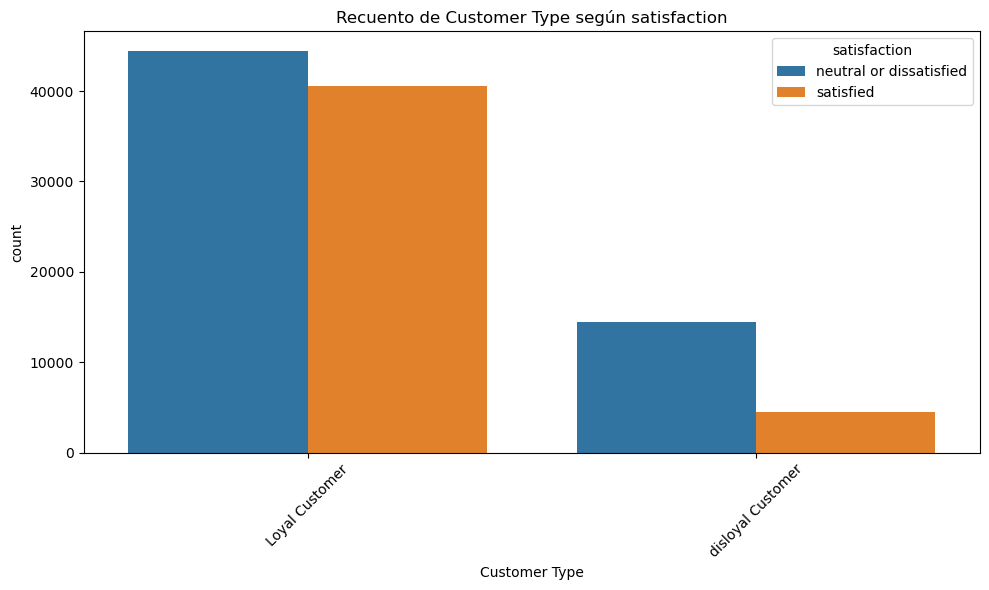

In [5]:
# Visualización de relaciones
relation_plot(df_train, 'Age', log=False)
relation_plot(df_train, 'Flight Distance', log=False)
relation_plot(df_train, 'Departure Delay in Minutes', log=True)
relation_plot(df_train, 'Customer Type', log=False)

In [6]:
# Quitamos la columna 'id' de los DataFrames, ya que no es relevante para el análisis y puede interferir con los modelos de machine learning.
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

### Tratamiento de Valores Nulos (NaN)

Al revisar el conjunto de entrenamiento, encontramos que solo la columna **`Arrival Delay in Minutes`** contiene valores nulos (310 registros).

Esta columna representa un valor numérico continuo, por lo que optamos por **rellenar los NaNs con la mediana** de la columna.  
La mediana es preferible a la media en este caso porque **no se ve afectada por valores atípicos (outliers)**.

Esto nos permite conservar todos los registros sin introducir sesgos extremos.


In [7]:
# Contamos todos los valores NaN por columna
nan_count = df_train.isna().sum()

print(nan_count[nan_count > 0])  # Muestra solo las columnas con NaN

nan_count

Arrival Delay in Minutes    310
dtype: int64


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
# Calculamos la mediana de la columna con valores nulos
arrival_delay_median = df_train['Arrival Delay in Minutes'].median()

arrival_delay_median

0.0

In [9]:
# Imputamos los NaNs con la mediana
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(arrival_delay_median)

# Volvemos a calcular los NaNs después de la imputación
nan_count = df_train.isna().sum()
nan_count


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Tratamiento de Outliers (Valores Atípicos)

Hemos aplicado un tratamiento de **capping** (recorte) usando el **método del rango intercuartílico (IQR)** en las variables numéricas continuas del conjunto de entrenamiento.

**¿Qué es el capping por IQR?**

- Se calculan los percentiles Q1 (25%) y Q3 (75%) de cada columna.
- Se define un rango válido: `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`.
- Los valores fuera de este rango se sustituyen por los límites (`clip()`), sin eliminar filas.

**¿Por qué no tratamos las variables categóricas o ordinales?**

- El concepto de outlier solo tiene sentido para variables **numéricas continuas**.
- Las variables de tipo encuesta (como `Check-in service`, `Food and drink`, etc.) están en una escala fija (0–5), y los extremos son respuestas válidas.

**Columnas tratadas**: 
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`
- `Flight Distance`

**Columnas excluidas**:
- Variables categóricas
- Variables ordinales tipo encuesta
- `satisfaction` (target)


In [10]:
def cap_outliers(df, include=None):
    """
    Aplica capping por IQR a las columnas numéricas especificadas en `include`.
    Las columnas no incluidas no se modifican.
    """
    capped_df = df.copy()

    if include is None:
        raise ValueError("Debes proporcionar una lista de columnas a incluir.")

    for col in include:
        if pd.api.types.is_numeric_dtype(capped_df[col]):
            Q1 = capped_df[col].quantile(0.25)
            Q3 = capped_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR

            # Aplicamos el capping
            capped_df[col] = capped_df[col].clip(lower, upper)
        else:
            print(f"[AVISO] La columna '{col}' no es numérica. Se omitirá.")

    return capped_df

In [11]:
# Columnas numéricas continuas seleccionadas para aplicar capping
columnas_incluir = [
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Flight Distance'
]

In [12]:
# Aplicamos el capping solo a estas columnas
df_train = cap_outliers(df_train, include=columnas_incluir)


### Codificación de Variables Categóricas y Variable Objetivo

Para que los modelos de Machine Learning puedan trabajar con las variables categóricas, es necesario transformarlas a variables numéricas. Aplicamos dos técnicas distintas:

#### 1. **OneHotEncoder** para variables categóricas:
Transformamos las siguientes columnas en variables binarias:
- `Gender`
- `Customer Type`
- `Type of Travel`
- `Class`

Cada categoría única se convierte en una columna con valores 0 o 1. Esto evita que el modelo interprete erróneamente una relación de orden entre las categorías.

#### 2. **LabelEncoder** para la variable objetivo `satisfaction`:
Convertimos los valores:
- `'satisfied'` → 1
- `'neutral or dissatisfied'` → 0

Esto nos permite usar métricas de clasificación binaria en las siguientes etapas.


In [13]:
# Partimos del DataFrame tratado con NaNs imputados y outliers recortados
df_train = df_train.copy()

In [14]:
# --- Codificación de variables categóricas ---
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
onehot = OneHotEncoder(drop='if_binary')  # Codificación completa, sin eliminar ninguna categoría

In [15]:
# Ajustamos el codificador y transformamos
encoded_cats = onehot.fit_transform(df_train[categorical_cols]).toarray()

In [16]:
# Obtenemos nombres de las nuevas columnas codificadas
encoded_cat_cols = onehot.get_feature_names_out(categorical_cols)
df_encoded_onehot = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=df_train.index)


In [17]:
# Concatenamos con el DataFrame original (eliminando las columnas categóricas originales)
df_train = pd.concat([df_train.drop(columns=categorical_cols), df_encoded_onehot], axis=1)

In [18]:
# --- Codificación de la variable objetivo ---
label_encoder = LabelEncoder()
df_train['satisfaction'] = label_encoder.fit_transform(df_train['satisfaction'])

In [19]:
df_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460.0,3,4,3,1,5,3,5,5,...,5,25,18.0,0,1.0,0.0,1.0,0.0,0.0,1.0
1,25,235.0,3,2,3,3,1,3,1,1,...,1,1,6.0,0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142.0,2,2,2,2,5,5,5,5,...,5,0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0
3,25,562.0,2,5,5,5,2,2,2,2,...,2,11,9.0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,61,214.0,3,3,3,3,4,5,5,3,...,3,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192.0,2,1,2,3,2,2,2,2,...,2,3,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0
103900,49,2347.0,4,4,4,4,2,4,5,5,...,4,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
103901,30,1995.0,1,1,1,3,4,1,5,4,...,4,7,14.0,0,1.0,1.0,0.0,1.0,0.0,0.0
103902,22,1000.0,1,1,1,5,1,1,1,1,...,1,0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0


### Mapa de Correlaciones

Para visualizar cómo se relacionan las variables numéricas entre sí, calculamos la matriz de **correlaciones de Pearson** y la representamos con un **mapa de calor** usando `seaborn`.

Este análisis es útil para:

- Detectar relaciones fuertes entre variables.
- Identificar redundancias o multicolinealidad.
- Ver qué variables se correlacionan más con la variable objetivo `satisfaction`.


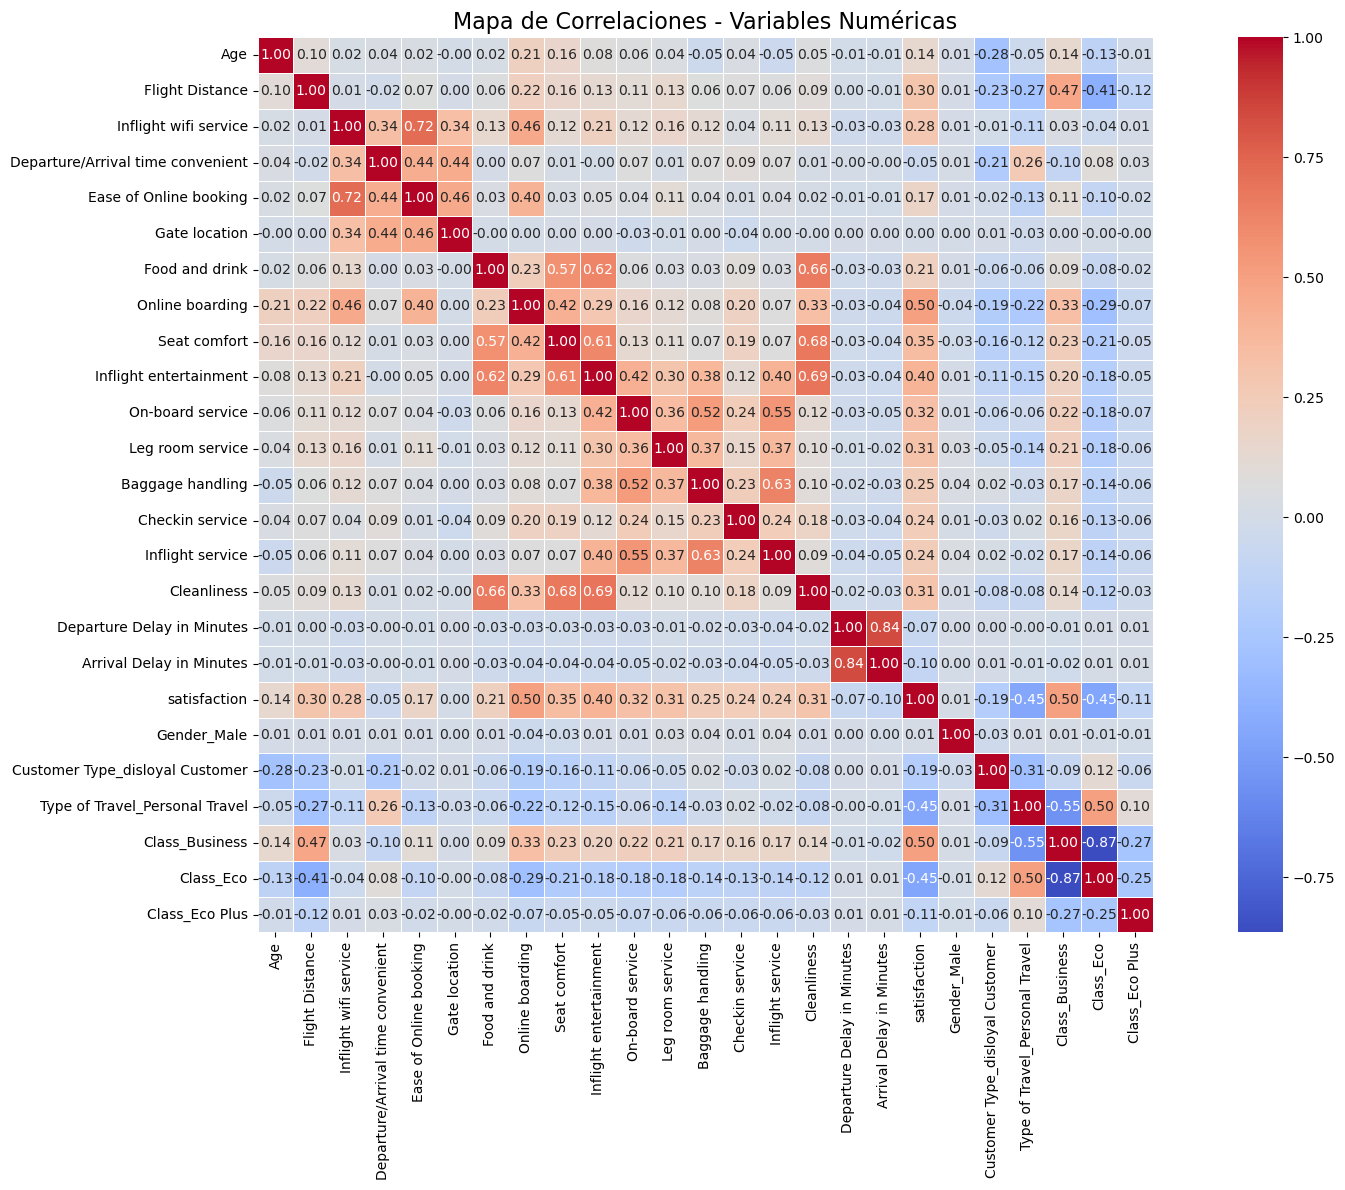

In [20]:
# Calculamos la matriz de correlaciones (solo columnas numéricas)
correlation_matrix = df_train.corr(numeric_only=True)

# Creamos el mapa de calor con Seaborn
plt.figure(figsize=(18, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Muestra los valores dentro de cada celda
    fmt=".2f",          # Formato con 2 decimales
    cmap="coolwarm",    # Paleta de colores
    linewidths=0.5,     # Líneas entre celdas
    square=True         # Celdas cuadradas
)

plt.title("Mapa de Correlaciones - Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


### Preparación del conjunto de test (`df_test`)

Aplicamos las mismas transformaciones que al conjunto de entrenamiento:
- Imputación de valores nulos con la **mediana del train**
- Codificación con el **OneHotEncoder entrenado**
- Codificación de la variable objetivo con el **LabelEncoder entrenado**

>  Importante: **No se aplica capping** (recorte de outliers) en el test para mantener su distribución realista.


In [21]:
# --- 1. Imputación de NaNs con la mediana del train ---
arrival_delay_median = df_train['Arrival Delay in Minutes'].median()
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(arrival_delay_median)

# --- 2. Codificación OneHotEncoder entrenado en train ---
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoded_test_array = onehot.transform(df_test[categorical_cols]).toarray()
encoded_test_cols = onehot.get_feature_names_out(categorical_cols)

# Creamos DataFrame con columnas codificadas
df_test_onehot = pd.DataFrame(encoded_test_array, columns=encoded_test_cols, index=df_test.index)

# Concatenamos y eliminamos las columnas originales
df_test = pd.concat([df_test.drop(columns=categorical_cols), df_test_onehot], axis=1)

# --- 3. Codificación de la variable objetivo ---
if 'satisfaction' in df_test.columns:
    df_test['satisfaction'] = label_encoder.transform(df_test['satisfaction'])


In [22]:
df_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,50,44.0,1,0.0,0.0,0.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,5,0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0
2,20,192,2,0,2,4,2,2,2,2,...,2,0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,...,4,0,6.0,1,1.0,0.0,0.0,1.0,0.0,0.0
4,49,1182,2,3,4,3,4,1,2,2,...,4,0,20.0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,4,0,0.0,0,1.0,1.0,0.0,1.0,0.0,0.0
25972,23,646,4,4,4,4,4,4,4,4,...,4,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0
25973,17,828,2,5,1,5,2,1,2,2,...,2,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,...,4,0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0


### División de variables y Escalado

Separamos las variables predictoras (`X`) de la variable objetivo (`y`) para ambos conjuntos. Luego escalamos los datos usando `MinMaxScaler`, ajustándolo solo con los datos de entrenamiento (`fit`) y aplicándolo al test (`transform`).


In [23]:
# --- Separación de variables predictoras y target ---
X_train = df_train.drop(columns='satisfaction')
y_train = df_train['satisfaction']

X_test = df_test.drop(columns='satisfaction')
y_test = df_test['satisfaction']

# --- Escalado con MinMaxScaler ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform solo con train
X_test_scaled = scaler.transform(X_test)         # transform solo con test


### Entrenamiento y Evaluación de Modelos de Machine Learning

En esta sección entrenamos varios modelos de clasificación usando el conjunto de datos preprocesado (`X_train` y `y_train`), y los evaluamos con el conjunto de test (`X_test` y `y_test`).

#### Modelos incluidos:
- **Logistic Regression**
- **Random Forest**
- **K-Nearest Neighbors**
- **Support Vector Machine (SVC)**
- **Gradient Boosting**

#### Preprocesamiento:
- Se aplicó `MinMaxScaler` para escalar las variables numéricas al rango [0, 1].
- Se usó `SimpleImputer` con estrategia `'median'` por si quedaban valores nulos tras el escalado.

#### Métricas calculadas:
- **Accuracy**: Porcentaje total de aciertos.
- **Precision**: Porcentaje de positivos predichos que son correctos.
- **Recall**: Porcentaje de verdaderos positivos detectados.
- **F1 Score**: Media armónica entre precision y recall.
- **ROC AUC**: Área bajo la curva ROC, mide discriminación del modelo.
- **Confusion Matrix**: Matriz de clasificación con TP, FP, FN, TN.

> Todos los resultados se muestran en un **DataFrame comparativo ordenado por F1 Score**, que nos permite elegir el modelo con mejor equilibrio entre precisión y recall.


In [24]:
# --- Modelos a evaluar ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# --- Entrenamiento y evaluación ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = (
        model.predict_proba(X_test)[:, 1]
        if hasattr(model, "predict_proba")
        else model.decision_function(X_test)
    )

    results.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    })

# --- Resultados en DataFrame ---
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

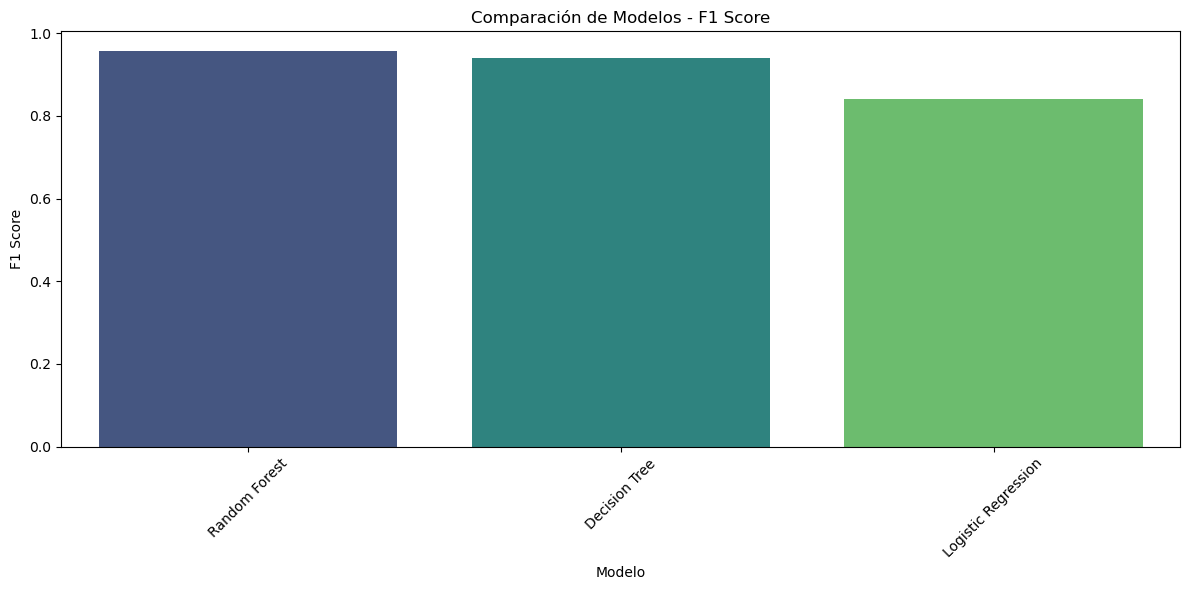

,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
1,Random Forest,0.962619,0.972549,0.941419,0.956731,0.993601,"[[14270, 303], [668, 10735]]"
2,Decision Tree,0.946297,0.937489,0.940367,0.938926,0.945652,"[[13858, 715], [680, 10723]]"
0,Logistic Regression,0.865106,0.873052,0.810576,0.840655,0.919068,"[[13229, 1344], [2160, 9243]]"


In [25]:
# --- Visualización de resultados ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='F1 Score', data=results_df,hue='Modelo', palette='viridis')
plt.title('Comparación de Modelos - F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

results_df

### Red Neuronal para Clasificación Binaria

En esta sección implementamos una **Red Neuronal densa (Multilayer Perceptron)** para resolver el problema de clasificación binaria sobre la satisfacción de los pasajeros (`satisfaction`).

#### Arquitectura utilizada:
- **Capa de entrada:** 256 neuronas, activación `ReLU`
- **Capa oculta:** 128 neuronas, activación `ReLU`
- **Capa oculta:** 64 neuronas, activación `ReLU`
- **Capa oculta:** 32 neuronas, activación `ReLU`
- **Capa oculta:** 16 neuronas, activación `ReLU`
- **Capa de salida:** 1 neurona, activación `Sigmoid` para clasificación binaria
- **Dropout:** aplicado para evitar sobreajuste

#### Hiperparámetros de entrenamiento:
- **Optimizador:** `Adam`
- **Función de pérdida:** `Binary Crossentropy`
- **Batch size:** 64
- **Épocas:** 20
- **Validación:** sobre el conjunto de test (`X_test`, `y_test`)

#### Métricas evaluadas:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **ROC AUC**
- **Confusion Matrix**

> La salida incluye un DataFrame con todas estas métricas para facilitar la comparación con otros modelos de Machine Learning.


In [26]:
# --- 1. Definición del modelo ---
model_nn = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.1),
    Dense(units=32, activation='relu'),
    Dropout(0.1),
    Dense(units=16, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')  # Salida binaria
])

model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback de parada temprana
early_stop = EarlyStopping(
    monitor='val_loss',          # O puedes usar 'val_accuracy'
    patience=3,                  # Nº de épocas sin mejora antes de parar
    restore_best_weights=True,  # Vuelve al mejor modelo (no el último)
    verbose=1
)

# --- 2. Entrenamiento ---
history = model_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # Número de épocas ajustado para evitar sobreajuste
    batch_size=64, # Tamaño de lote ajustado para evitar problemas de memoria
    verbose=1,
    callbacks=[early_stop]  # Añadir el callback aquí
)

# --- 3. Evaluación ---
y_pred_prob_nn = model_nn.predict(X_test).flatten()
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)

# --- 4. Métricas ---
nn_results = {
    "Modelo": "Red Neuronal",
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn),
    "Recall": recall_score(y_test, y_pred_nn),
    "F1 Score": f1_score(y_test, y_pred_nn),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob_nn),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_nn)
}

# Mostrar resultados
nn_df = pd.DataFrame([nn_results])
nn_df


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1624/1624 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5615 - loss: 1.8586 - val_accuracy: 0.6402 - val_loss: 0.6484
Epoch 2/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6335 - loss: 0.6561 - val_accuracy: 0.6317 - val_loss: 0.6498
Epoch 3/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6421 - loss: 0.6499 - val_accuracy: 0.6461 - val_loss: 0.6494
Epoch 4/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7177 - loss: 0.5697 - val_accuracy: 0.8379 - val_loss: 0.4043
Epoch 5/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8357 - loss: 0.4004 - val_accuracy: 0.8405 - val_loss: 0.4204
Epoch 6/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8500 - loss: 0.3643 - val_accuracy: 0.8614 - val_loss: 0.3477
Epoch 7/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8646 - loss: 0.3299 - val_accuracy: 0.8290 - val_loss: 0.3860
Epoch 8/50
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8723 - loss: 0.3076 - val_accurac

,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
0,Red Neuronal,0.866454,0.952751,0.732088,0.827969,0.957746,"[[14159, 414], [3055, 8348]]"


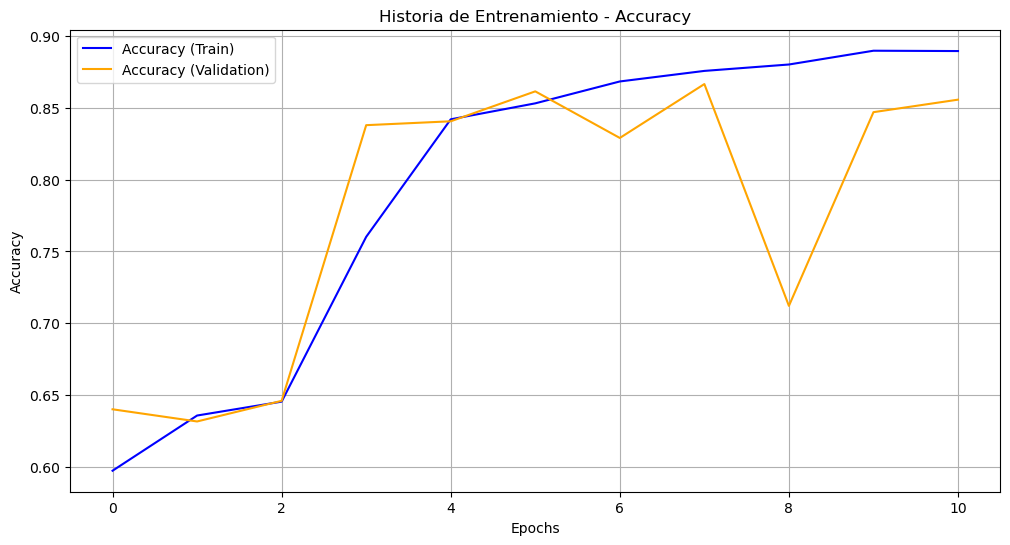

In [27]:
# visuazion de la historia de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy (Train)', color='blue')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)', color='orange')
plt.title('Historia de Entrenamiento - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

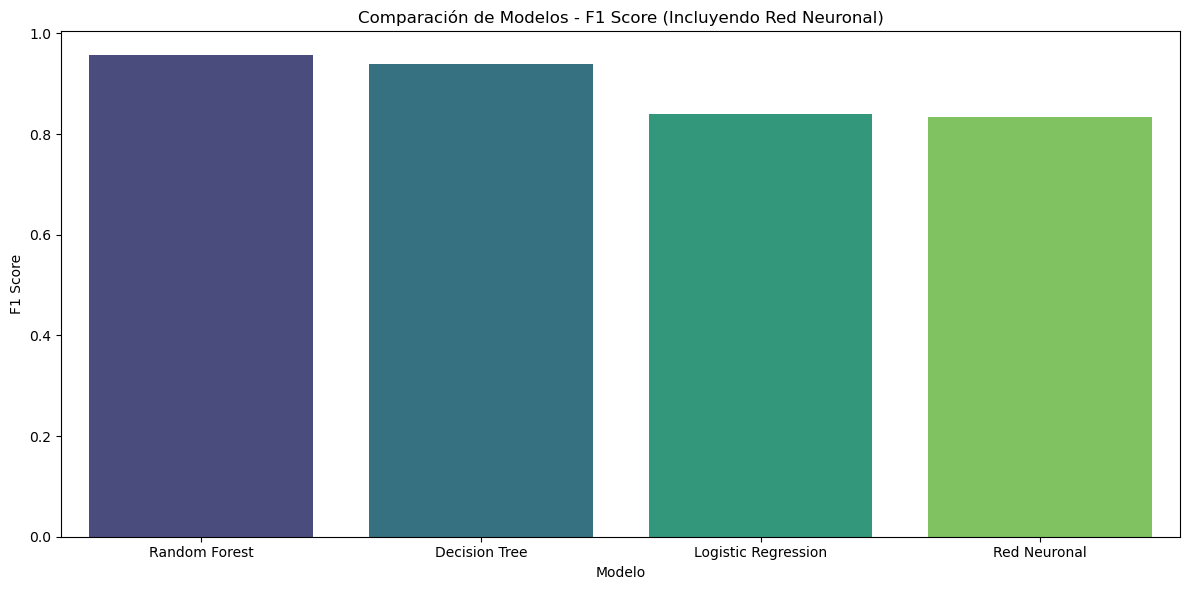

,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
0,Random Forest,0.962311,0.971333,0.941945,0.956413,0.993623,"[[14256, 317], [662, 10741]]"
1,Decision Tree,0.945796,0.935968,0.940893,0.938424,0.945263,"[[13839, 734], [674, 10729]]"
2,Logistic Regression,0.865106,0.873052,0.810576,0.840655,0.919068,"[[13229, 1344], [2160, 9243]]"
3,Red Neuronal,0.868417,0.940236,0.747786,0.833040,0.954870,"[[14031, 542], [2876, 8527]]"


In [133]:
# Combinar métricas de modelos clásicos con red neuronal
combined_df = pd.concat([results_df, nn_df], ignore_index=True).sort_values(by="F1 Score", ascending=False)

# Visualizar resultados combinados
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='F1 Score', data=combined_df, hue='Modelo', palette='viridis')
plt.title('Comparación de Modelos - F1 Score (Incluyendo Red Neuronal)')
plt.tight_layout()
plt.show()

combined_df

### Comparación de Métricas por Threshold

A continuación se analiza cómo afecta el **threshold de decisión** al rendimiento de la red neuronal. En lugar de usar el valor por defecto (0.5), se prueban **100 valores entre 0 y 1** para observar la evolución de las siguientes métricas:

- **Accuracy**: Proporción total de aciertos.
- **Precision**: Proporción de positivos predichos que son realmente positivos.
- **Recall**: Proporción de positivos reales que se identificaron correctamente.
- **F1 Score**: Media armónica entre precisión y recall.

Esta estrategia es útil cuando se quiere **ajustar el comportamiento del modelo** a diferentes necesidades. Por ejemplo:
- Si quiero **detectar todos los clientes satisfechos posibles**, me interesa un **recall alto**.
- Si quiero **asegurarme de que los que etiqueto como satisfechos realmente lo estén**, necesito **alta precisión**.

La siguiente gráfica permite observar cómo evolucionan las métricas en función del threshold.


In [28]:
# Asegúrate de tener esta variable desde el modelo entrenado
# y_pred_prob_nn = model_nn.predict(X_test).flatten()

# 100 thresholds entre 0 y 1
thresholds = np.linspace(0, 1, 100) # 100 valores entre 0 y 1

metrics = [] # Lista para almacenar métricas por threshold
for threshold in thresholds:
    y_pred_thresh = (y_pred_prob_nn >= threshold).astype(int) # Convertir probabilidades a clases usando el threshold
    
    metrics.append({
        "Threshold": threshold,
        "Accuracy": accuracy_score(y_test, y_pred_thresh),
        "Precision": precision_score(y_test, y_pred_thresh, zero_division=0),
        "Recall": recall_score(y_test, y_pred_thresh),
        "F1 Score": f1_score(y_test, y_pred_thresh)
    })

df_thresholds = pd.DataFrame(metrics)

In [29]:
df_thresholds

,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.000000,0.438982,0.438982,1.000000,0.610129
1,0.010101,0.470088,0.453053,0.999474,0.623485
2,0.020202,0.716084,0.608408,0.991230,0.754011
3,0.030303,0.761588,0.650805,0.985881,0.784043
4,0.040404,0.783685,0.674217,0.981496,0.799343
...,...,...,...,...,...
95,0.959596,0.595858,0.983957,0.080681,0.149133
96,0.969697,0.586233,0.979502,0.058669,0.110707
97,0.979798,0.576301,0.969267,0.035955,0.069339
98,0.989899,0.565984,0.927152,0.012277,0.024234


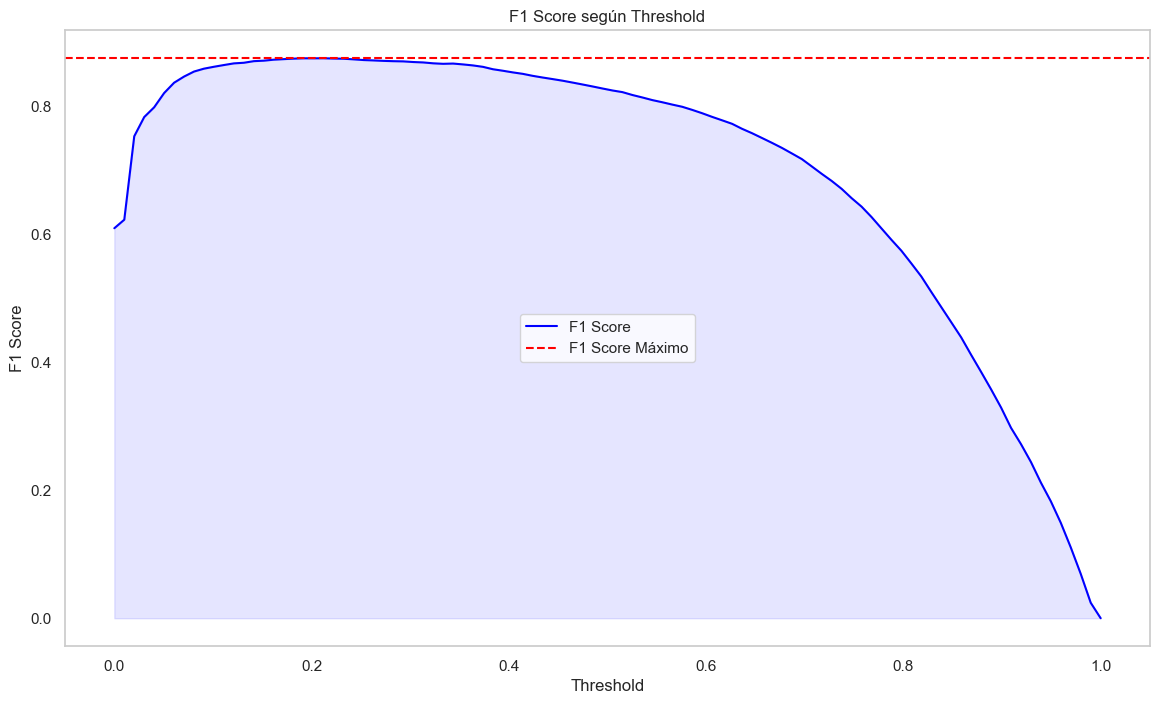

Threshold óptimo para F1 Score máximo: 0.21


In [ ]:
# Visualización de las métricas según el threshold
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_thresholds, x='Threshold', y='F1 Score', label='F1 Score', color='blue')
plt.fill_between(df_thresholds['Threshold'], 0, df_thresholds['F1 Score'], color='blue', alpha=0.1)
plt.title('F1 Score según Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.axhline(y=df_thresholds['F1 Score'].max(), color='red', linestyle='--', label='F1 Score Máximo')
plt.legend()
plt.grid()
plt.show()

# Encontrar el threshold óptimo basado en el F1 Score máximo
optimal_threshold = df_thresholds.loc[df_thresholds['F1 Score'].idxmax(), 'Threshold']
print(f"Threshold óptimo para F1 Score máximo: {optimal_threshold:.2f}")

### Comparación de Modelos con Red Neuronal Ajustada (Threshold = 0.21)

Hasta ahora, comparamos distintos modelos de clasificación usando el threshold por defecto (`0.5`) para la red neuronal. Sin embargo, en muchos casos prácticos este valor **no es el más óptimo**, especialmente si queremos **maximizar ciertas métricas** como el F1 Score, Precision o Recall.

Tras analizar la evolución de métricas con diferentes thresholds, encontramos que un **threshold de 0.21** ofrecía el **mejor F1 Score**. Esto significa que al bajar el umbral de decisión, el modelo es más flexible para etiquetar como "satisfecho", lo que puede ayudar a mejorar el recall sin sacrificar mucho la precisión.

A continuación, se muestra la comparación actualizada de F1 Score entre todos los modelos clásicos, la red neuronal con threshold por defecto y la red neuronal ajustada con el nuevo threshold:

- **Random Forest** sigue destacando como el mejor modelo tradicional.
- **Red Neuronal (thresh=0.21)** mejora claramente respecto a su versión sin ajuste.
- El ajuste de threshold puede ser crucial si el objetivo del negocio es reducir errores específicos (por ejemplo, falsos negativos).

> Esta técnica de ajuste de umbral es especialmente útil cuando se trabaja con modelos probabilísticos (como redes neuronales o regresión logística) y se requiere afinar el comportamiento del modelo según las necesidades del problema.

In [31]:
# evaluar el modelo con el threshold óptimo
y_pred_prob_nn = model_nn.predict(X_test).flatten()
y_pred_nn = (y_pred_prob_nn >= 0.21).astype(int)

# --- 4. Métricas ---
nn_results = {
    "Modelo": "Red Neuronal",
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn),
    "Recall": recall_score(y_test, y_pred_nn),
    "F1 Score": f1_score(y_test, y_pred_nn),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob_nn),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_nn)
}

# Mostrar resultados
nn_df = pd.DataFrame([nn_results])
nn_df

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
0,Red Neuronal,0.889629,0.863729,0.888801,0.876086,0.957746,"[[12974, 1599], [1268, 10135]]"


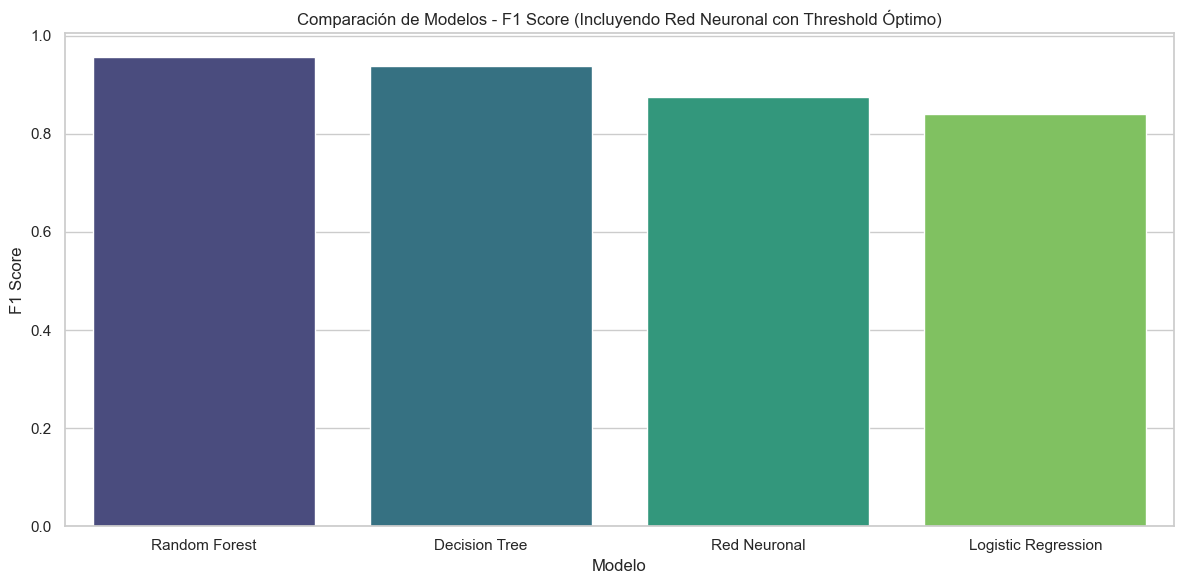

In [32]:
# Combinar métricas de modelos clásicos con red neuronal
combined_df = pd.concat([results_df, nn_df], ignore_index=True).sort_values(by="F1 Score", ascending=False)

# Visualizar resultados combinados
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='F1 Score', data=combined_df, hue='Modelo', palette='viridis')
plt.title('Comparación de Modelos - F1 Score (Incluyendo Red Neuronal con Threshold Óptimo)')
plt.tight_layout()
plt.show()

### Comparación de Matrices de Confusión

La siguiente visualización muestra cómo cambia el comportamiento de la red neuronal al modificar el **threshold de decisión** de 0.5 (por defecto) a 0.21 (óptimo para F1 Score):

- Al usar `0.21`, el modelo es **más propenso a predecir "satisfecho"**, por lo que aumenta el número de verdaderos positivos (mayor recall).
- Sin embargo, esto también **aumenta los falsos positivos**, lo que puede afectar la precisión si no se controla.

Esta decisión debe tomarse según el objetivo del negocio. Por ejemplo:
- En una encuesta de satisfacción, podría interesar más detectar correctamente a los pasajeros satisfechos aunque eso implique etiquetar por error a algunos que no lo están (alta **recall**).
- En cambio, si solo queremos asegurar que los etiquetados como satisfechos realmente lo están (alta **precision**), usar un threshold más alto sería preferible.


In [33]:
# Predicciones
y_pred_default = (y_pred_prob_nn >= 0.5).astype(int)
y_pred_thresh_021 = (y_pred_prob_nn >= 0.21).astype(int)

# Matrices
cm_default = confusion_matrix(y_test, y_pred_default)
cm_thresh = confusion_matrix(y_test, y_pred_thresh_021)

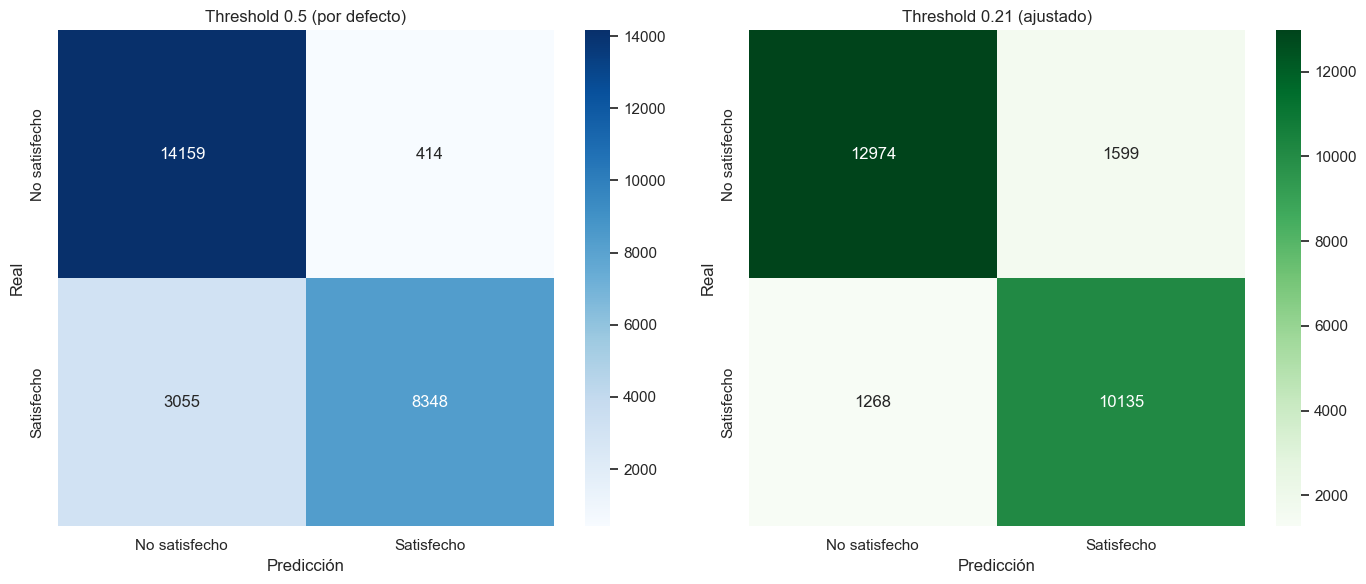

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Matriz con threshold = 0.5
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Threshold 0.5 (por defecto)")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Real")
axs[0].set_xticklabels(['No satisfecho', 'Satisfecho'])
axs[0].set_yticklabels(['No satisfecho', 'Satisfecho'])

# Matriz con threshold = 0.21
sns.heatmap(cm_thresh, annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title("Threshold 0.21 (ajustado)")
axs[1].set_xlabel("Predicción")
axs[1].set_ylabel("Real")
axs[1].set_xticklabels(['No satisfecho', 'Satisfecho'])
axs[1].set_yticklabels(['No satisfecho', 'Satisfecho'])

plt.tight_layout()
plt.show()

### Interpretación de la Matriz de Confusión: Threshold 0.5 vs Threshold 0.21

A continuación se comparan las matrices de confusión para la red neuronal con dos umbrales de decisión distintos:

#### Threshold = 0.5 (por defecto):
- **Verdaderos negativos (TN):** 14.159
- **Falsos positivos (FP):** 414
- **Falsos negativos (FN):** 3.055
- **Verdaderos positivos (TP):** 8.348

Este resultado indica un modelo **conservador**, que solo etiqueta como "satisfecho" cuando está bastante seguro. El número de **falsos negativos** es relativamente alto (3.055), lo cual puede ser un problema si el objetivo es **detectar correctamente a los pasajeros satisfechos**.

---

#### Threshold = 0.21 (ajustado):
- **Verdaderos negativos (TN):** 12.974
- **Falsos positivos (FP):** 1.599
- **Falsos negativos (FN):** 1.268
- **Verdaderos positivos (TP):** 10.135

Al reducir el umbral a 0.21, el modelo se vuelve **más permisivo**, prediciendo como "satisfecho" a más pasajeros. Esto se traduce en:
- Un **incremento importante en verdaderos positivos** (de 8.348 a 10.135)
- Una **reducción clara de falsos negativos** (de 3.055 a 1.268)
- Pero también un **aumento de falsos positivos** (de 414 a 1.599)

---

#### Conclusión:
El cambio de threshold **mejora la capacidad del modelo para identificar pasajeros satisfechos (mayor recall)**, aunque introduce más errores al predecir pasajeros como satisfechos cuando no lo están.

Este tipo de ajuste es útil cuando **el coste de no detectar un cliente satisfecho es mayor que el de equivocarse en algún insatisfecho**, como por ejemplo para campañas de fidelización o encuestas de experiencia positiva.

> Ajustar el threshold permite adaptar el modelo a objetivos concretos del negocio, algo que el valor por defecto (0.5) no siempre consigue.


In [ ]:
##############################################################################################################################